# sample of WC display from XSF file


## imports some library

In [1]:
import netCDF4  as nc
import math
import numpy as np
import matplotlib.pyplot as plt

## set the files paths

In [2]:
base_path="D://XSF//"
filename="revE_0023_20180628_122559_ShipName.xsf"
file_path= base_path + filename

## chose a swath number of interest

In [3]:
swathNumber=0

## really read the file

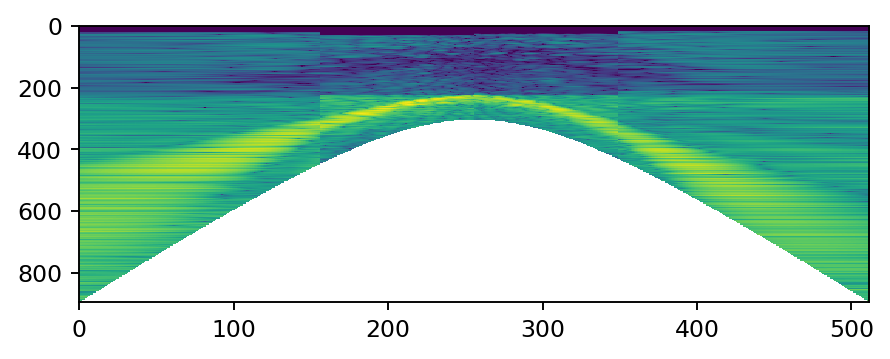

In [4]:
with nc.Dataset(file_path) as dataset:
    reflectivity_count= dataset['/sounder/water_column/rx_info/sample_count']
    reflectivity_offset= dataset['/sounder/water_column/rx_info/sample_offset']
    sample_amplitude = dataset['/sounder/water_column/rx_info/sample_amplitude']
    numOfPings = int(dataset["/sounder"].dimensions["swath_dim"].size)
    numOfBeams = int(dataset["/sounder"].dimensions["beam_dim"].size)


    #initialize ping (with nans)\n",
    max_samples = max(reflectivity_count[swathNumber])
    ping = np.zeros((numOfBeams, max_samples))
    ping.fill(float(np.nan))
    #fill ping with data\n",
    for bnr in range(numOfBeams):
        ping[bnr][:reflectivity_count[swathNumber][bnr]] = sample_amplitude[reflectivity_offset[swathNumber][bnr]:reflectivity_offset[swathNumber][bnr] + reflectivity_count[swathNumber][bnr]]

    #plot the ping
    plt.rcParams['figure.dpi'] = 170

    plt.imshow(ping.transpose(),aspect=0.2);
